**Import libraries**

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import dataset**

In [ ]:
final_merged_dataset = pd.read_csv("final_data_breaches.csv")

final_merged_dataset['year'] = pd.to_numeric(final_merged_dataset['year'], errors='coerce')
final_merged_dataset['records lost'] = pd.to_numeric(final_merged_dataset['records lost'], errors='coerce')

**Graphics**



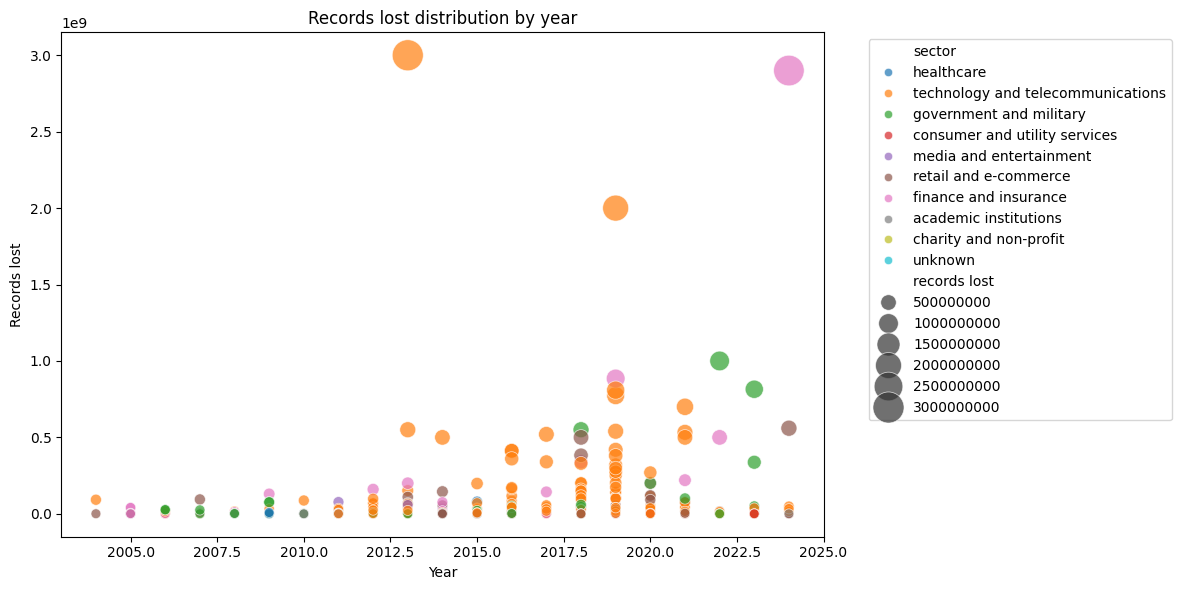

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(final_merged_dataset, x='year', y='records lost', hue='sector', size='records lost', sizes=(50, 500), alpha=0.7)
ax.set_title('Records lost distribution by year')
ax.set_xlabel('Year')
ax.set_ylabel('Records lost')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**1. Yearly data breaches violations & records lost**

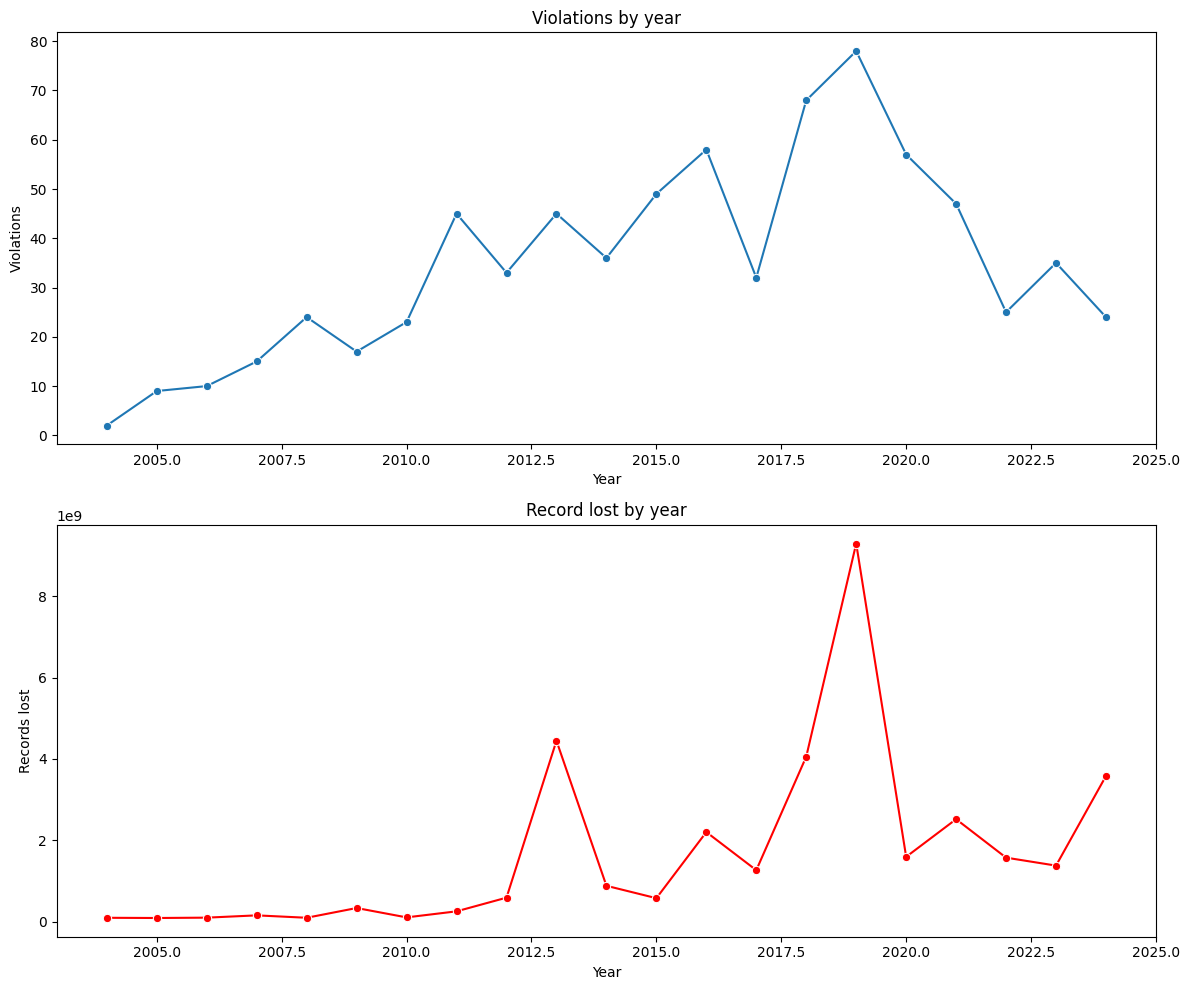

In [41]:
violations_by_year = final_merged_dataset.groupby('year').agg({
    'organization': 'count',
    'records lost': 'sum'
}).rename(columns={'organization': 'violations'})

fig, ax = plt.subplots(2, 1, figsize=(12, 10))
sns.lineplot(data=violations_by_year, x=violations_by_year.index, y='violations', ax=ax[0], marker='o')
ax[0].set_title('Violations by year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Violations')

sns.lineplot(data=violations_by_year, x=violations_by_year.index, y='records lost', ax=ax[1], marker='o', color='red')
ax[1].set_title('Record lost by year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Records lost')

plt.tight_layout()
plt.show()

**2. Sectors data breaches**

/var/folders/rt/r98xkfj17y3d96qp_lptv2700000gn/T/ipykernel_4257/1531775091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=violations_by_sector.index, x=violations_by_sector['violations'], ax=ax[0], palette='pastel')
/var/folders/rt/r98xkfj17y3d96qp_lptv2700000gn/T/ipykernel_4257/1531775091.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=violations_by_sector.index, x=violations_by_sector['records lost'], ax=ax[1], palette='pastel')


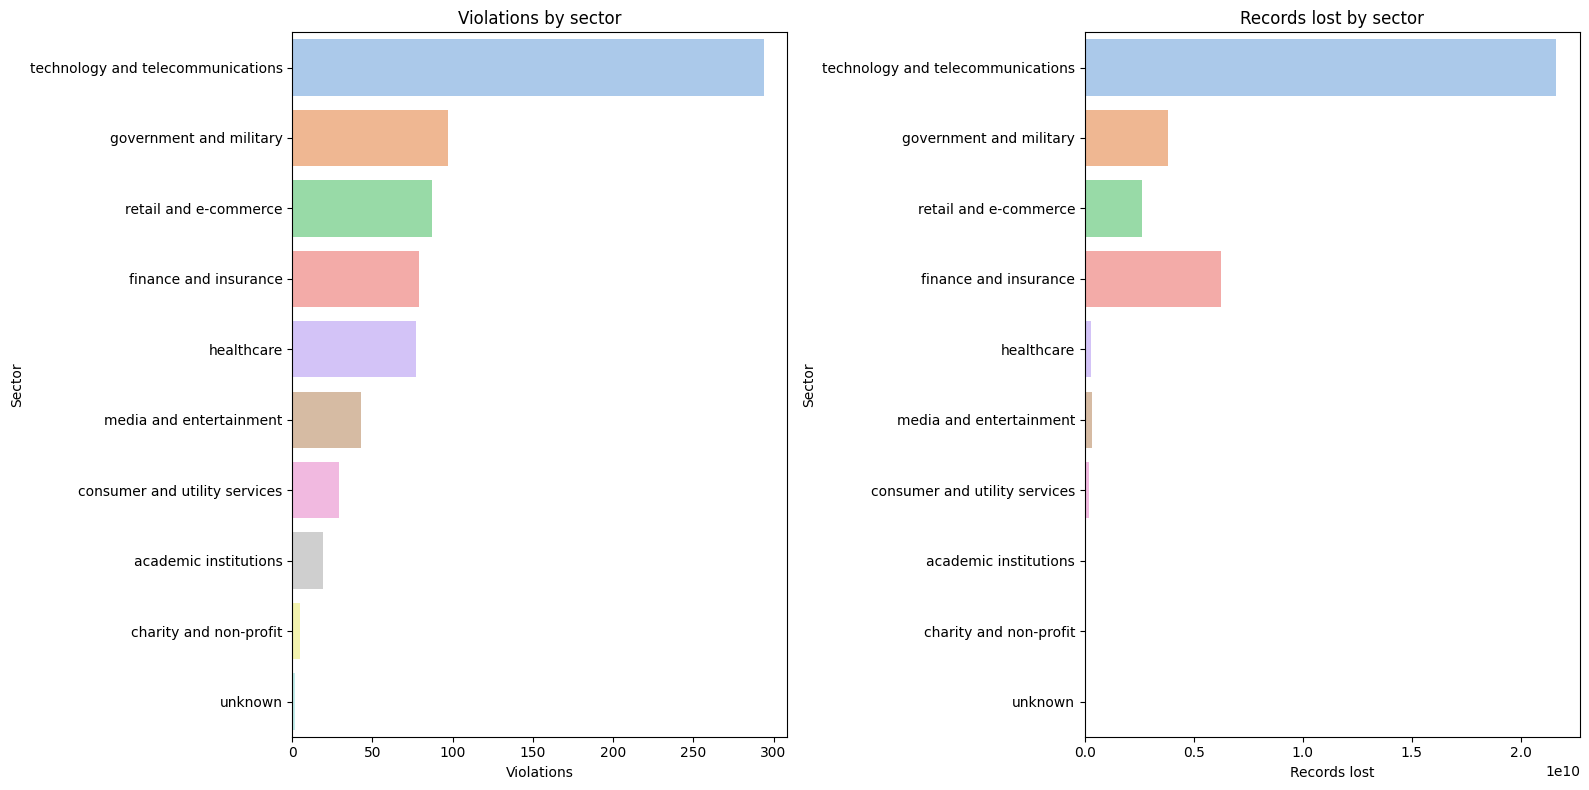

In [48]:
violations_by_sector = final_merged_dataset.groupby('sector').agg({
    'organization': 'count',
    'records lost': 'sum'
}).rename(columns={'organization': 'violations'}).sort_values(by='violations', ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.barplot(y=violations_by_sector.index, x=violations_by_sector['violations'], ax=ax[0], palette='pastel')
ax[0].set_title('Violations by sector')
ax[0].set_xlabel('Violations')
ax[0].set_ylabel('Sector')

sns.barplot(y=violations_by_sector.index, x=violations_by_sector['records lost'], ax=ax[1], palette='pastel')
ax[1].set_title('Records lost by sector')
ax[1].set_xlabel('Records lost')
ax[1].set_ylabel('Sector')

plt.tight_layout()
plt.show()

**3. Top 3 methods for data breaches**

/var/folders/rt/r98xkfj17y3d96qp_lptv2700000gn/T/ipykernel_4257/115491858.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=records_by_method.index, x=records_by_method['avg_records_lost'], palette='pastel')


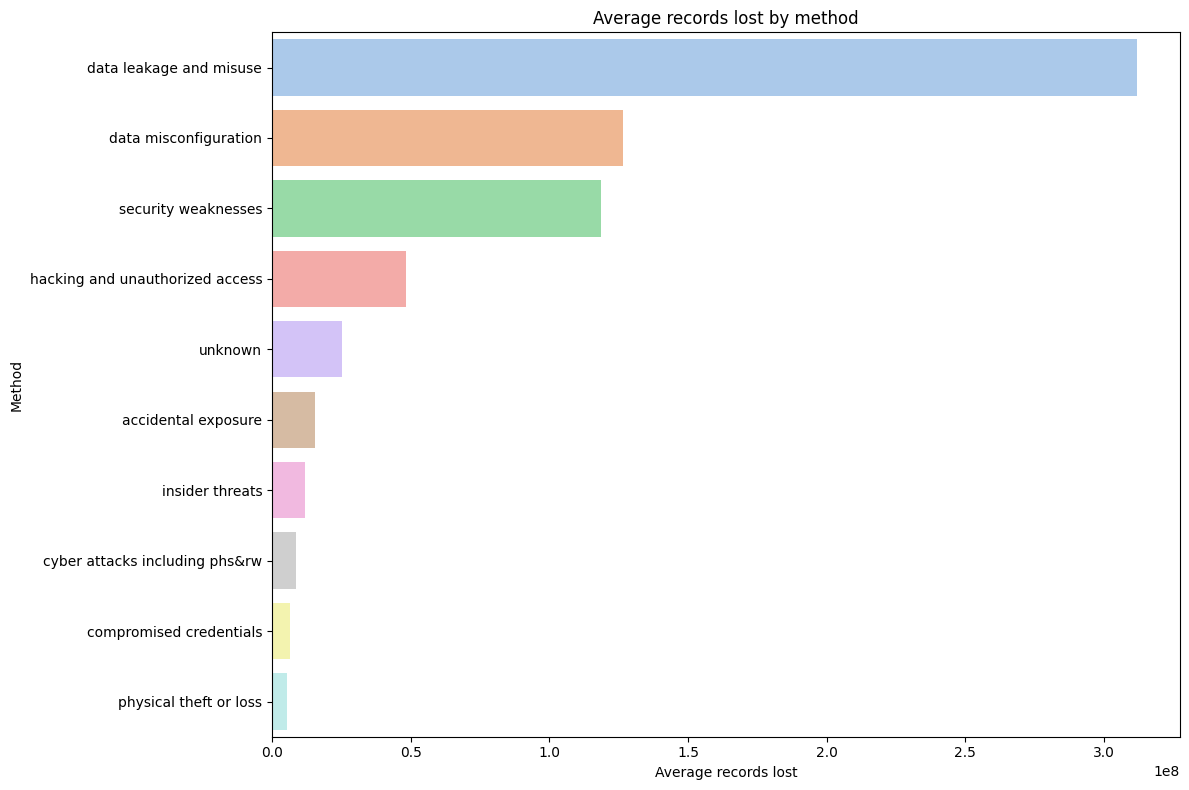

In [49]:
records_by_method = final_merged_dataset.groupby('method').agg({
    'records lost': ['mean', 'sum'], 
    'organization': 'count'
}).rename(columns={'organization': 'violations'})
records_by_method.columns = ['avg_records_lost', 'total_records_lost', 'violations']
records_by_method = records_by_method.sort_values(by='avg_records_lost', ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(y=records_by_method.index, x=records_by_method['avg_records_lost'], palette='pastel')
ax.set_title('Average records lost by method')
ax.set_xlabel('Average records lost')
ax.set_ylabel('Method')
plt.tight_layout()
plt.show()

**3. Top 3 organizations for first sector in data breaches**

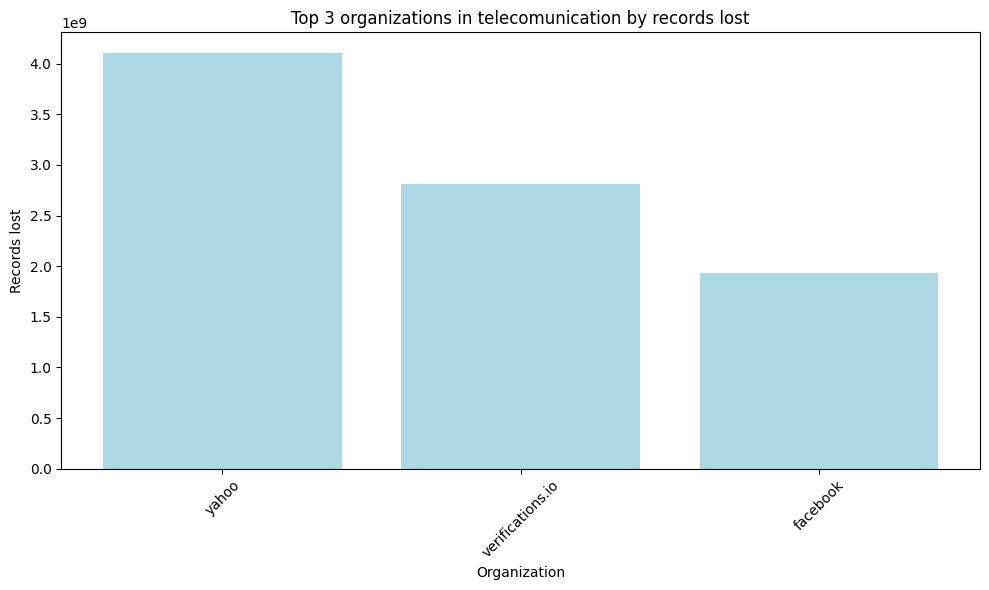

In [50]:
telecom_data = final_merged_dataset[final_merged_dataset['sector'] == 'technology and telecommunications']
organization_data = telecom_data.groupby('organization')['records lost'].sum().reset_index()
top_telecom_organizations = organization_data.sort_values(by='records lost', ascending=False).head(3)

plt.figure(figsize=(10,6))
plt.bar(top_telecom_organizations['organization'], top_telecom_organizations['records lost'], color='lightblue')
plt.title('Top 3 organizations in telecomunication by records lost')
plt.xlabel('Organization')
plt.ylabel('Records lost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

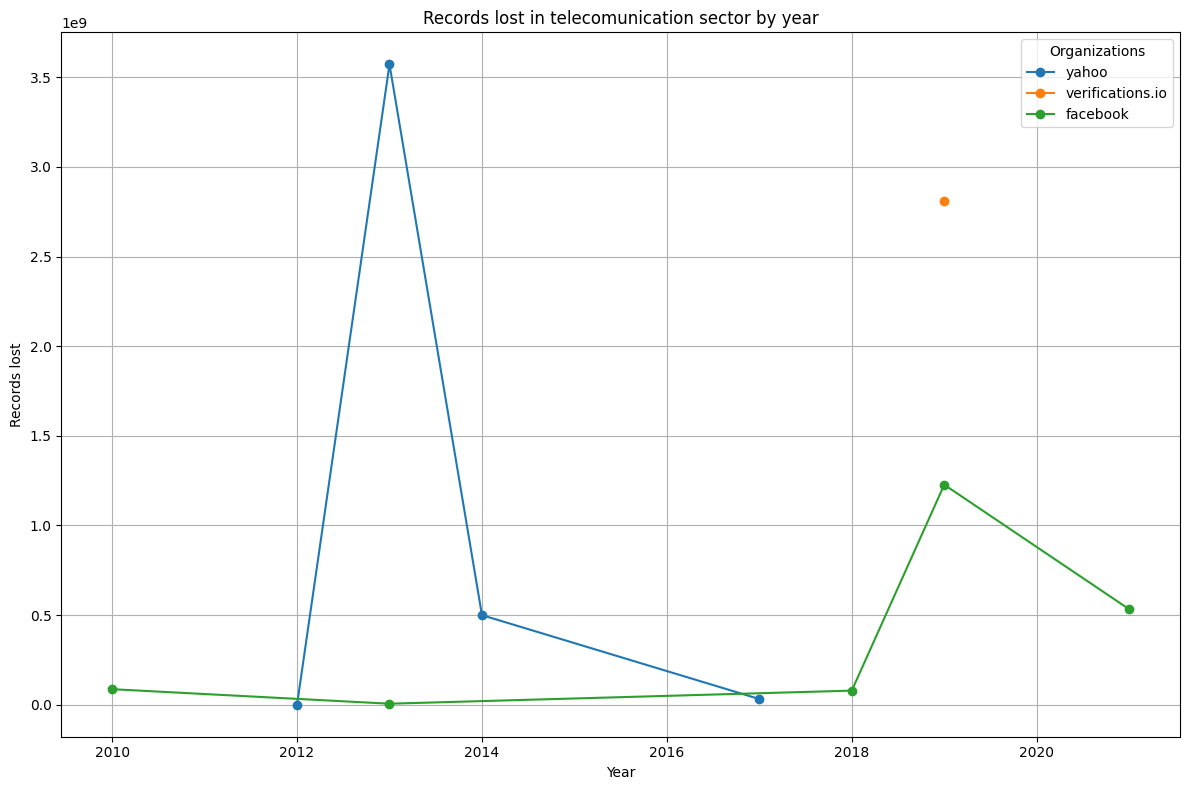

In [45]:
top_telecom_organizations_list = top_telecom_organizations['organization'].tolist()
filtered_data = final_merged_dataset[final_merged_dataset['organization'].isin(top_telecom_organizations_list)]

grouped_data = filtered_data.groupby(['year', 'organization'])['records lost'].sum().reset_index()
plt.figure(figsize=(12, 8))

for org in top_telecom_organizations_list:
    org_data = grouped_data[grouped_data['organization'] == org]
    plt.plot(org_data['year'], org_data['records lost'], marker='o', label=org)

plt.title('Records lost in telecomunication sector by year')
plt.xlabel('Year')
plt.ylabel('Records lost')
plt.legend(title='Organizations')
plt.grid(True)
plt.tight_layout()
plt.show()